In [2]:
import sys
import os

import pandas as pd
import json
from datasets import load_dataset
from huggingface_hub import login

from dotenv import load_dotenv

# Load Env Variables
load_dotenv()
# load Benchmark Data
# Paste your token here (or load from environment variable)
hf_token = os.getenv("HF_ACCESS_TOKEN")
login(token=hf_token)
dataset = load_dataset("myothiha/ontobench_path_vqa_result", split="train", cache_dir="/mnt/synology/myothiha/HF_CACHE")

/home/anaconda3/envs/myo_thesis/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 100%|██████████| 6/6 [00:00<00:00, 298.50 examples/s]


In [3]:
from PIL import Image
import matplotlib.pyplot as plt


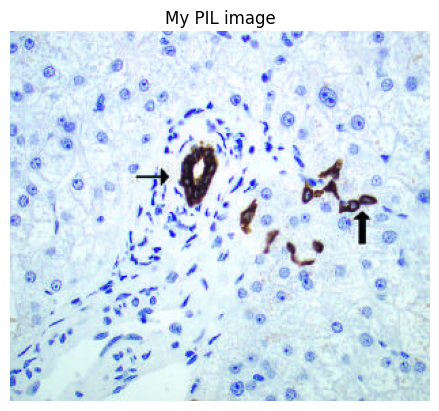

Question: where are liver stem cells (oval cells) located?
Ground Truth Answer: in the canals of hering
Model Answer: Periportal areas.
Score: 0.5
Conceptual Understanding: canals
Positive Accuracy: 0.6
Negative Accuracy: 0.0
Conceptual Understanding: oval cells
Positive Accuracy: 0.8
Negative Accuracy: 0.0
Conceptual Understanding: liver stem cells
Positive Accuracy: 0.8
Negative Accuracy: 0.67
Conceptual Understanding: hering
Positive Accuracy: 0.2
Negative Accuracy: 0.0


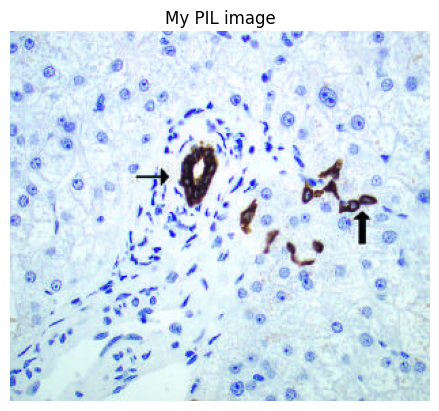

Question: what are stained here with an immunohistochemical stain for cytokeratin 7?
Ground Truth Answer: bile duct cells and canals of hering
Model Answer: Psammoma bodies and tumor cells.
Score: 0.0
Conceptual Understanding: hering
Positive Accuracy: 0.2
Negative Accuracy: 0.0
Conceptual Understanding: canals
Positive Accuracy: 0.6
Negative Accuracy: 0.0
Conceptual Understanding: cytokeratin 7
Positive Accuracy: 0.8
Negative Accuracy: 1.0
Conceptual Understanding: immunohistochemical stain
Positive Accuracy: 1.0
Negative Accuracy: 0.67
Conceptual Understanding: bile duct cells
Positive Accuracy: 0.2
Negative Accuracy: 0.67


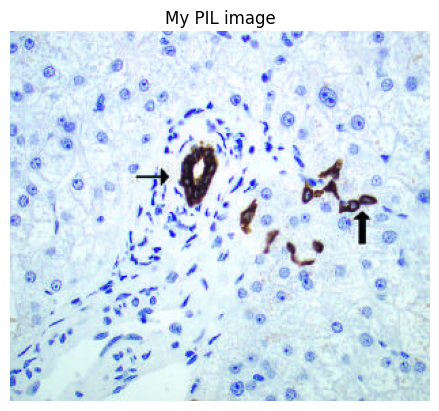

Question: what are bile duct cells and canals of hering stained here with for cytokeratin 7?
Ground Truth Answer: an immunohistochemical stain
Model Answer: Brown.
Score: 0.5
Conceptual Understanding: hering
Positive Accuracy: 0.2
Negative Accuracy: 0.0
Conceptual Understanding: canals
Positive Accuracy: 0.6
Negative Accuracy: 0.0
Conceptual Understanding: cytokeratin 7
Positive Accuracy: 0.8
Negative Accuracy: 0.67
Conceptual Understanding: immunohistochemical stain
Positive Accuracy: 1.0
Negative Accuracy: 0.67
Conceptual Understanding: bile duct cells
Positive Accuracy: 0.2
Negative Accuracy: 0.67


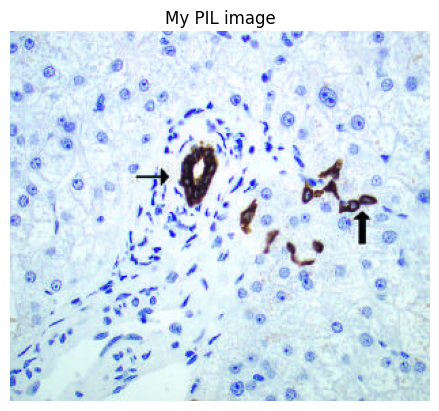

Question: are bile duct cells and canals of hering stained here with an immunohistochemical stain for cytokeratin 7?
Ground Truth Answer: yes
Model Answer: Yes.
Score: 1.0
Conceptual Understanding: hering
Positive Accuracy: 0.2
Negative Accuracy: 0.0
Conceptual Understanding: canals
Positive Accuracy: 0.6
Negative Accuracy: 0.0
Conceptual Understanding: cytokeratin 7
Positive Accuracy: 0.8
Negative Accuracy: 0.67
Conceptual Understanding: immunohistochemical stain
Positive Accuracy: 1.0
Negative Accuracy: 0.67
Conceptual Understanding: bile duct cells
Positive Accuracy: 0.2
Negative Accuracy: 1.0


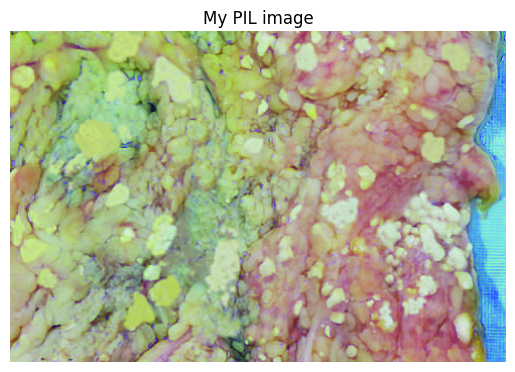

Question: what do the areas of white chalky deposits represent?
Ground Truth Answer: foci of fat necrosis
Model Answer: Calcium deposits.
Score: 0.0
Conceptual Understanding: white chalky deposits
Positive Accuracy: 0.6
Negative Accuracy: 0.67
Conceptual Understanding: fat necrosis
Positive Accuracy: 1.0
Negative Accuracy: 0.33
Conceptual Understanding: foci
Positive Accuracy: 0.8
Negative Accuracy: 0.33


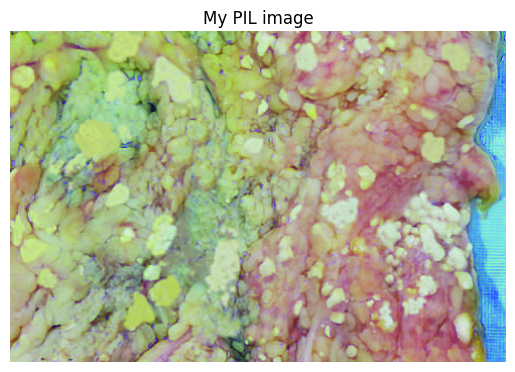

Question: how do the areas of white chalky deposits represent foci of fat necrosis?
Ground Truth Answer: with calcium soap formation (saponification)
Model Answer: Fat necrosis.
Score: 0.5
Conceptual Understanding: white chalky deposits
Positive Accuracy: 0.6
Negative Accuracy: 0.67
Conceptual Understanding: fat necrosis
Positive Accuracy: 1.0
Negative Accuracy: 1.0


In [19]:
for i, row in enumerate(dataset):
    plt.imshow(row["image"])
    plt.axis('off')          # optional: hide axes
    plt.title('My PIL image')# optional
    plt.show()

    print(f"Question: {row['question']}")
    print(f"Ground Truth Answer: {row['answer']}")
    print(f"Model Answer: {row['model_answer']}")
    print(f"Score: {row['score']}")
    conceptual_understanding = json.loads(row['reasoning_result'])

    for concept, result in conceptual_understanding.items():
        print(f"Conceptual Understanding: {concept}")
        print("Positive Accuracy:", round(result['positive_accuracy'], 2))
        print("Negative Accuracy:", round(result['negative_accuracy'], 2))

1.23